In [184]:
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use("ggplot")

In [187]:
DATA_DIR = "data/avazu-ctr-prediction"
PLOTS_DIR = "plots"

In [ ]:
df = pd.read_csv(f"../{DATA_DIR}/train.csv")

In [87]:
df_sample = df[["id", "click", "hour"]]

In [88]:
df_sample["hour"] = pd.to_datetime(df_sample["hour"], format="%y%m%d%H")
df_sample = df_sample.rename(columns={"hour": "timestamp"})

C:\Users\Praca\AppData\Local\Temp\ipykernel_15784\3114950161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["hour"] = pd.to_datetime(df_sample["hour"], format="%y%m%d%H")


In [ ]:
df_sample

In [115]:
time_sample = df_sample[["click", "timestamp"]]
time_sample = time_sample.set_index("timestamp")

In [127]:
time_sample

,click
timestamp,
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
...,...
2014-10-30 23:00:00,1
2014-10-30 23:00:00,0
2014-10-30 23:00:00,0


In [128]:
time_sample.groupby("click").head()

,click
timestamp,
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,1
2014-10-21,1
2014-10-21,1
2014-10-21,1


In [134]:
ctr = time_sample.groupby("timestamp").apply(lambda x: x["click"].sum() / x["click"].count())

In [135]:
ctr_df = ctr.to_frame()

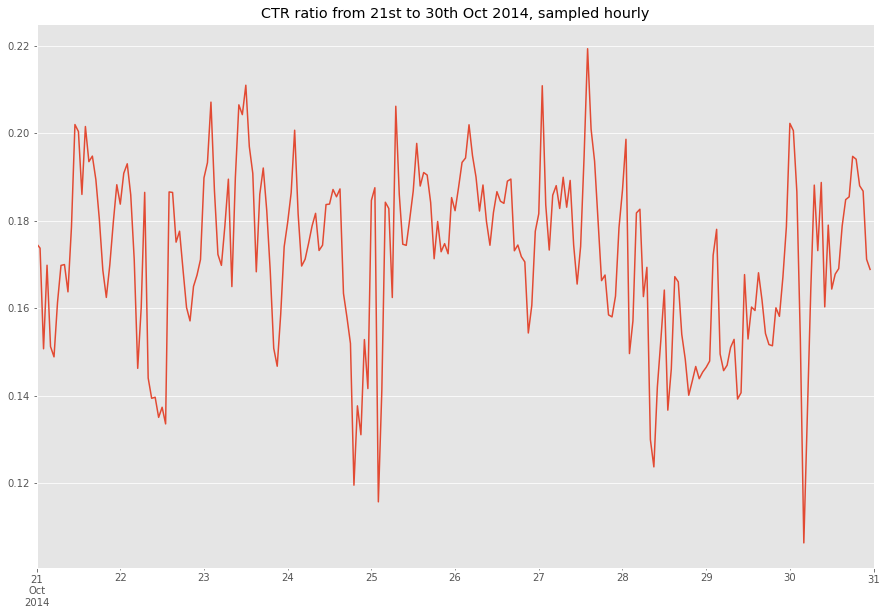

In [195]:
ctr_df.plot()

plt.xlim("2014-10-21 00:00:00", "2014-10-31 00:00:00")
plt.title("CTR ratio from 21st to 30th Oct 2014, sampled hourly")
plt.legend("", frameon=False)
plt.xlabel("")
plt.rcParams["figure.figsize"] = (15, 25)
plt.savefig(f"../{PLOTS_DIR}/ctr_ratio.png")
plt.show()